# Computational Mechanics Project #01 - Heat Transfer in Forensic Science

We can use our current skillset for a macabre application. We can predict the time of death based upon the current temperature and change in temperature of a corpse. 

Forensic scientists use Newton's law of cooling to determine the time elapsed since the loss of life, 

$\frac{dT}{dt} = -K(T-T_a)$,

where $T$ is the current temperature, $T_a$ is the ambient temperature, $t$ is the elapsed time in hours, and $K$ is an empirical constant. 

Suppose the temperature of the corpse is 85$^o$F at 11:00 am. Then, 2 hours later the temperature is 74$^{o}$F. 

Assume ambient temperature is a constant 65$^{o}$F.

1. Use Python to calculate $K$ using a finite difference approximation, $\frac{dT}{dt} \approx \frac{T(t+\Delta t)-T(t)}{\Delta t}$.

In [1]:
T11=85
T13=65
K = -(74-85)/2/(85-65)
print('K={:.3f} 1/hours'.format(K))

K=0.275 1/hours


2. Change your work from problem 1 to create a function that accepts the temperature at two times, ambient temperature, and the time elapsed to return $K$.

In [2]:
def measure_K(Temp_t1,Temp_t2,Temp_ambient,delta_t):
    ''' Determine the value of K based upon temperature of corpse 
    when discovered, Temp_t1
    after time, delta_t, Temp_t2
    with ambient temperature, Temp_ambient
    Arguments
    ---------
    Temp_t1: initial temperature (F)
    Temp_t2: temperature after time delta_t (F)
    Temp_ambient: ambient temperature (F)
    delta_t: time passed between temperature measures (hours)
    
    Returns
    -------
    K: heat transfer coefficient (1/hours)
    
    '''
    K = -(Temp_t2-Temp_t1)/delta_t/(Temp_t1-Temp_ambient)
    
    return K

In [3]:
print('K={:.3f} 1/hours'.format(measure_K(85,74,65,2)))

K=0.275 1/hours


3. A first-order thermal system has the following analytical solution, 

    $T(t) =T_a+(T(0)-T_a)e^{-Kt}$

    where $T(0)$ is the temperature of the corpse at t=0 hours i.e. at the time of discovery and $T_a$ is a constant ambient temperature. 

    a. Show that an Euler integration converges to the analytical solution as the time step is decreased. Use the constant $K$ derived above and the initial temperature, T(0) = 85$^o$F. 

    b. What is the final temperature as t$\rightarrow\infty$?
    
    c. At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

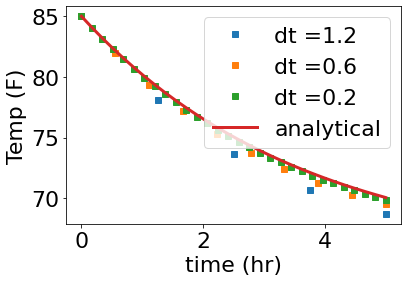

In [5]:
N=10
T_ambient = 65
for N in [5,10,30]:
    t=np.linspace(0,5,N)
    dt = t[1]-t[0]
    T=np.zeros(N)

    T[0] = 85
    for i in range(1,len(t)):
        T[i] = T[i-1]-K*(T[i-1]-T_ambient)*dt

    def T_an(t,T_0=85,T_ambient=65):
        return T_ambient+(T_0-T_ambient)*np.exp(-K*t)
    plt.plot(t,T,'s', label = 'dt ={:.1f}'.format(dt))


plt.plot(t,T_an(t),label='analytical')
plt.xlabel('time (hr)')
plt.ylabel('Temp (F)')
plt.legend();

# (b)

$T(t= \infty) = 65^{o}F$

# (c)

In [6]:
t_death = np.log((98.6-T_ambient)/(T[0]-T_ambient))/-K

hour = int(11+t_death)
minute = (11+t_death-hour)*60
t_death

-1.8865228851460631

Text(0, 0.5, 'Temp (F)')

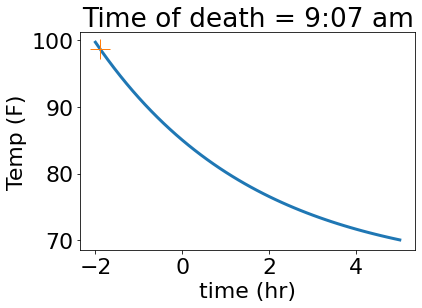

In [7]:
t=np.linspace(-2,5)
plt.plot(t,T_an(t))
plt.plot(t_death,T_an(t_death),'+',markersize=20)

plt.title('Time of death = {}:{:02.0f} am'.format(hour,minute))
plt.xlabel('time (hr)')
plt.ylabel('Temp (F)')

4. Now that we have a working numerical model, we can look at the results if the
ambient temperature is not constant i.e. T_a=f(t). We can use the weather to improve our estimate for time of death. Consider the following Temperature for the day in question. 

    |time| Temp ($^o$F)|
    |---|---|
    |8am|55|
    |9am|58|
    |10am|60|
    |11am|65|
    |noon|66|
    |1pm|67|

    a. Create a function that returns the current temperature based upon the time (0 hours=11am, 65$^{o}$F) 
    *Plot the function $T_a$ vs time. Does it look correct? Is there a better way to get $T_a(t)$?

    b. Modify the Euler approximation solution to account for changes in temperature at each hour. 
    Compare the new nonlinear Euler approximation to the linear analytical model. 
    At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

In [8]:
def f_T_amb(t):
    T_ambient = 55
    if t<-3:
        T_ambient = 55
    elif t<-2 and t>=-3:
        T_ambient = 58
    elif t<-1 and t>=-2:
        T_ambient = 60
    elif t<0 and t>=-1:
        T_ambient =65
    elif t<1 and t>=0:
        T_ambient = 66
    elif t>=1:
        T_ambient = 67
    return T_ambient
        

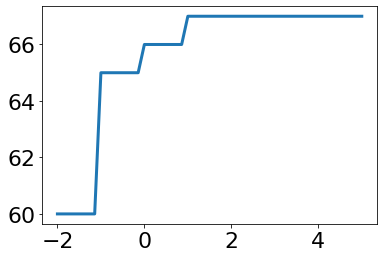

In [9]:
T_amb_var = np.zeros(len(t))
for i in range(0,len(t)):
    T_amb_var[i] = f_T_amb(t[i])
plt.plot(t,T_amb_var)

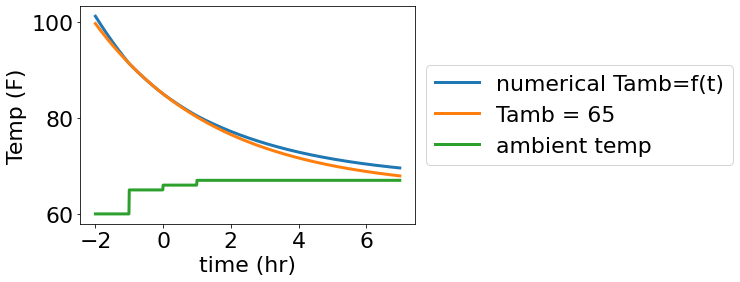

In [10]:
dt = 0.01
t=np.arange(-2,7,dt)
N=len(t)

T=np.zeros(N)

i0 = int(2/dt)

T[i0] = 85
for i in range(i0+1,len(t)):
    T[i] = T[i-1]-K*(T[i-1]-f_T_amb(t[i-1]))*dt

for i in range(i0,-1,-1):
    T[i] = T[i+1]+K*(T[i+1]-f_T_amb(t[i+1]))*dt
    
def T_an(t,T_0=85,T_ambient=65):
    return T_ambient+(T_0-T_ambient)*np.exp(-K*t)
plt.plot(t,T,'-', label = 'numerical Tamb=f(t)')
plt.plot(t,T_an(t),label='Tamb = 65')
T_amb_var = np.zeros(len(t))
for i in range(0,len(t)):
    T_amb_var[i] = f_T_amb(t[i])

plt.plot(t,T_amb_var,label='ambient temp')
plt.xlabel('time (hr)')
plt.ylabel('Temp (F)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [11]:
2/dt

200.0